In [2]:
# Cargar el CVS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

consumo_granada = pd.read_csv('../data/processed/consumo_granada_cleaned.csv')
consumo_granada['timestamp'] = pd.to_datetime(consumo_granada['timestamp'])  # Convertir a datetime

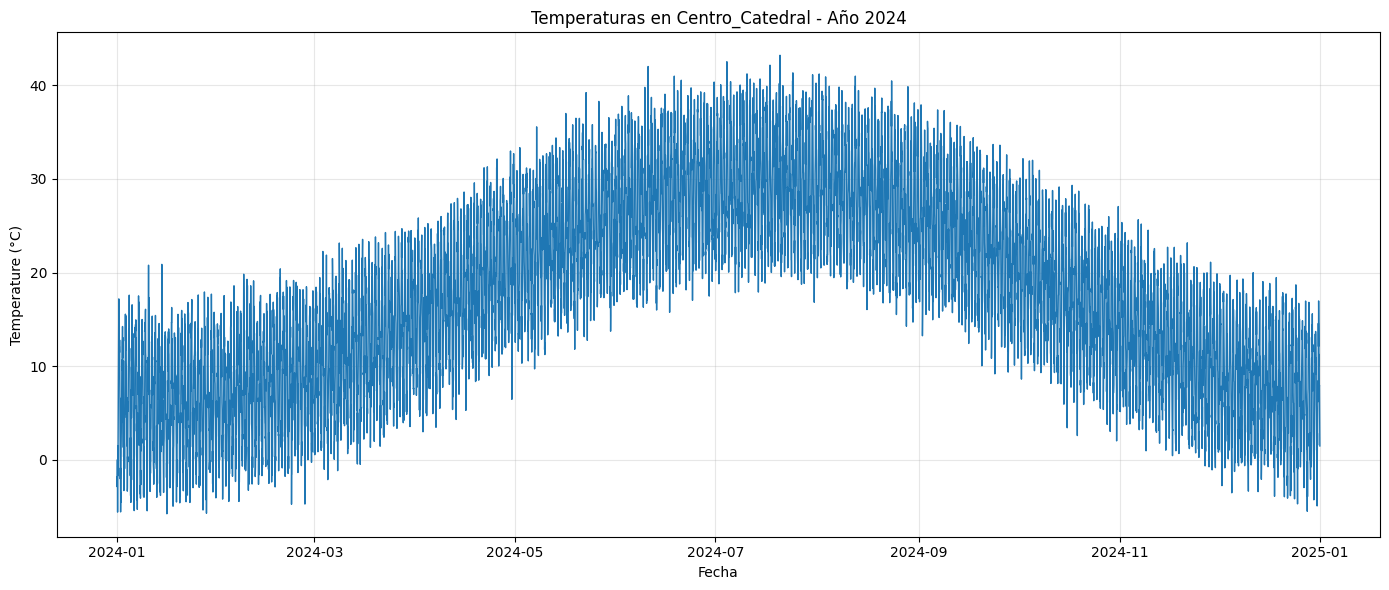

Datos graficados: 8884 puntos


In [3]:
# Filtrar datos para hacer el gráfico más manejable
zona = 'Centro_Catedral'
año = 2024
datos_filtrados = consumo_granada[
    (consumo_granada['zone_name'] == zona) & 
    (consumo_granada['timestamp'].dt.year == año)
]

plt.figure(figsize=(14, 6))
plt.plot(datos_filtrados['timestamp'], datos_filtrados['temperature'], linewidth=1)
plt.title(f'Temperaturas en {zona} - Año {año}')
plt.xlabel('Fecha')
plt.ylabel('Temperature (°C)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Datos graficados: {len(datos_filtrados)} puntos")

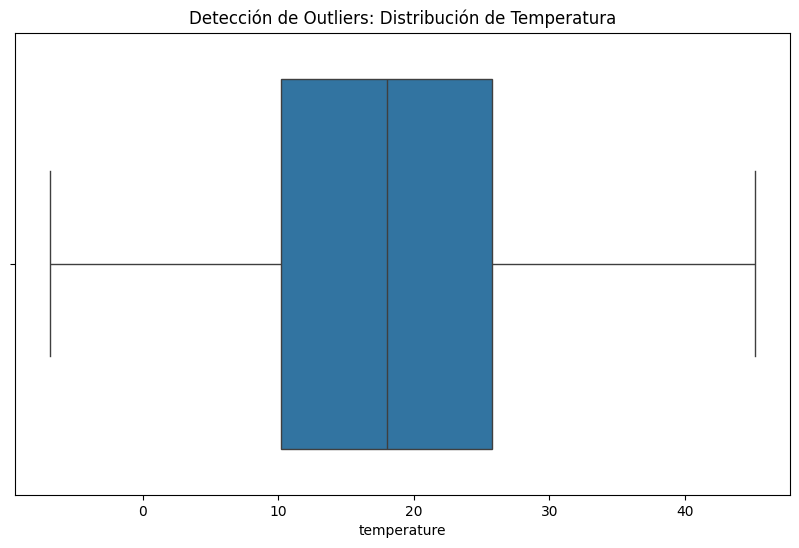

In [4]:
# Diagrama de caja y bigotes para detección de outliers de temperatura.
plt.figure(figsize=(10, 6))
# Boxplot para ver la distribución global
sns.boxplot(x=consumo_granada['temperature'])
plt.title('Detección de Outliers: Distribución de Temperatura')
plt.show()

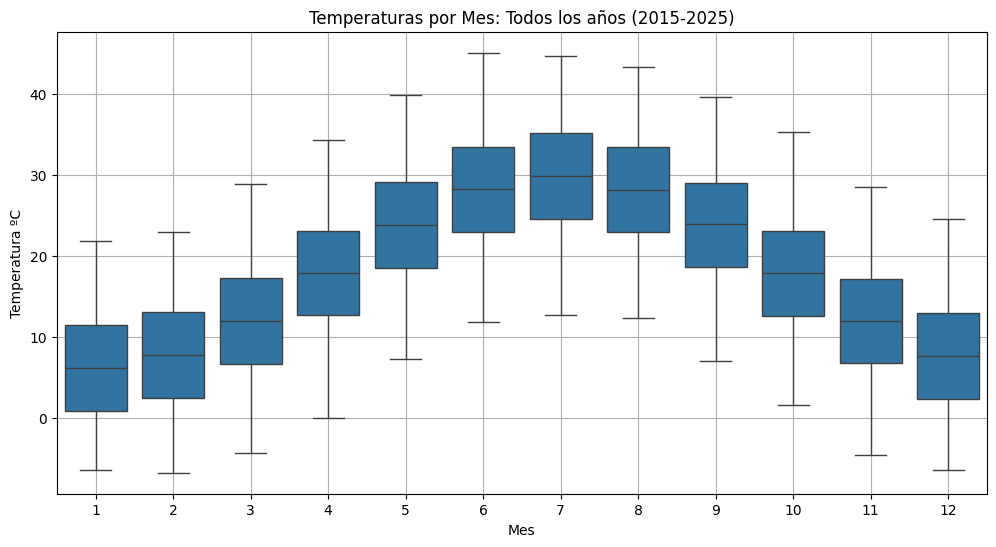

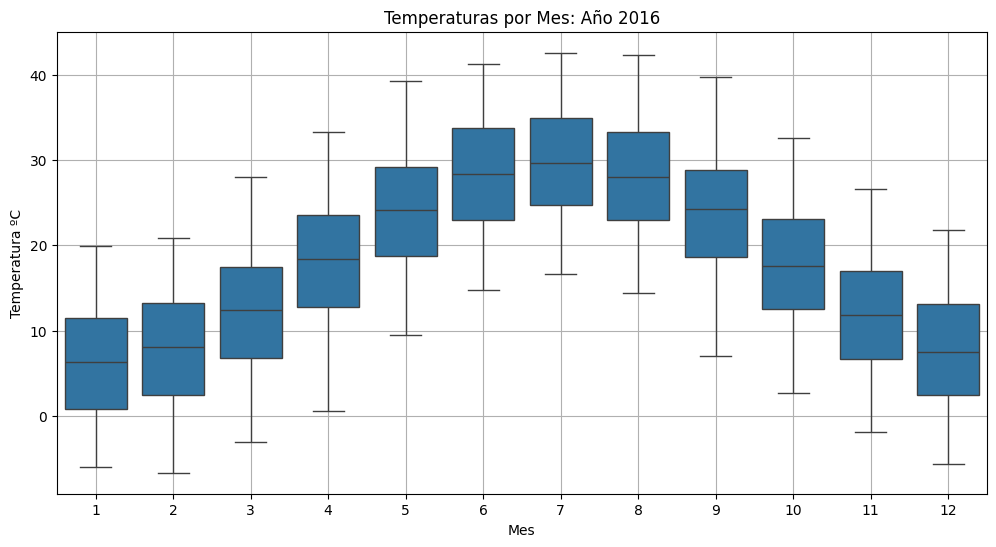

In [5]:
# Diagrama de caja y bigotes desglosado por mes para ver patrones estacionales.
# Boxplot desglosado por mes - TODOS LOS AÑOS
plt.figure(figsize=(12, 6))
sns.boxplot(x=consumo_granada['timestamp'].dt.month, y=consumo_granada['temperature'])
plt.title('Temperaturas por Mes: Todos los años (2015-2025)')
plt.xlabel('Mes')
plt.ylabel('Temperatura ºC')
plt.grid(True)
plt.show()

# Ver un año específico (por ejemplo 2016)
año_especifico = 2016
datos_año = consumo_granada[consumo_granada['timestamp'].dt.year == año_especifico]
plt.figure(figsize=(12, 6))
sns.boxplot(x=datos_año['timestamp'].dt.month, y=datos_año['temperature'])
plt.title(f'Temperaturas por Mes: Año {año_especifico}')
plt.xlabel('Mes')
plt.ylabel('Temperatura ºC')
plt.grid(True)
plt.show()

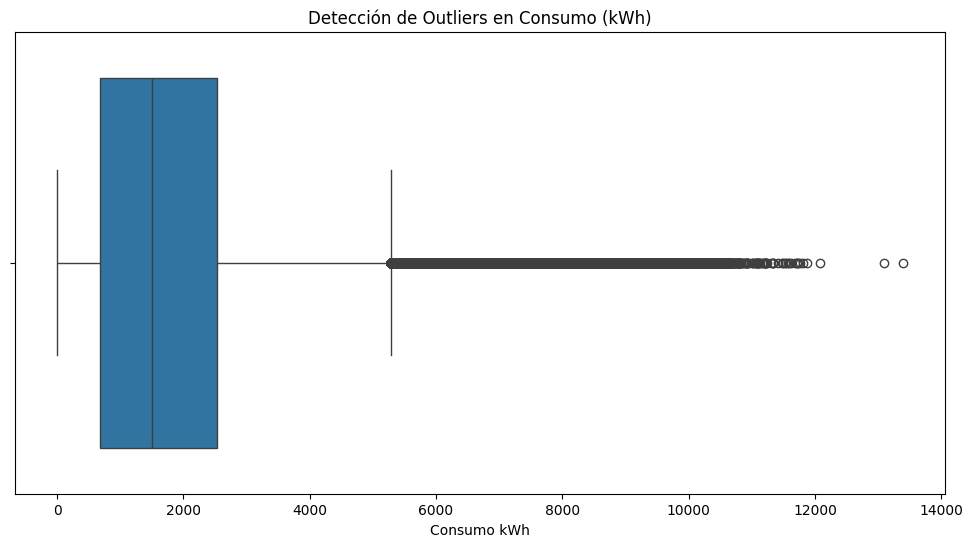

In [6]:
# Visualización de outlayers en consumo_kwh
plt.figure(figsize=(12, 6))
sns.boxplot(x=consumo_granada['consumption_kwh'])
plt.title('Detección de Outliers en Consumo (kWh)')
plt.xlabel('Consumo kWh')
plt.show()

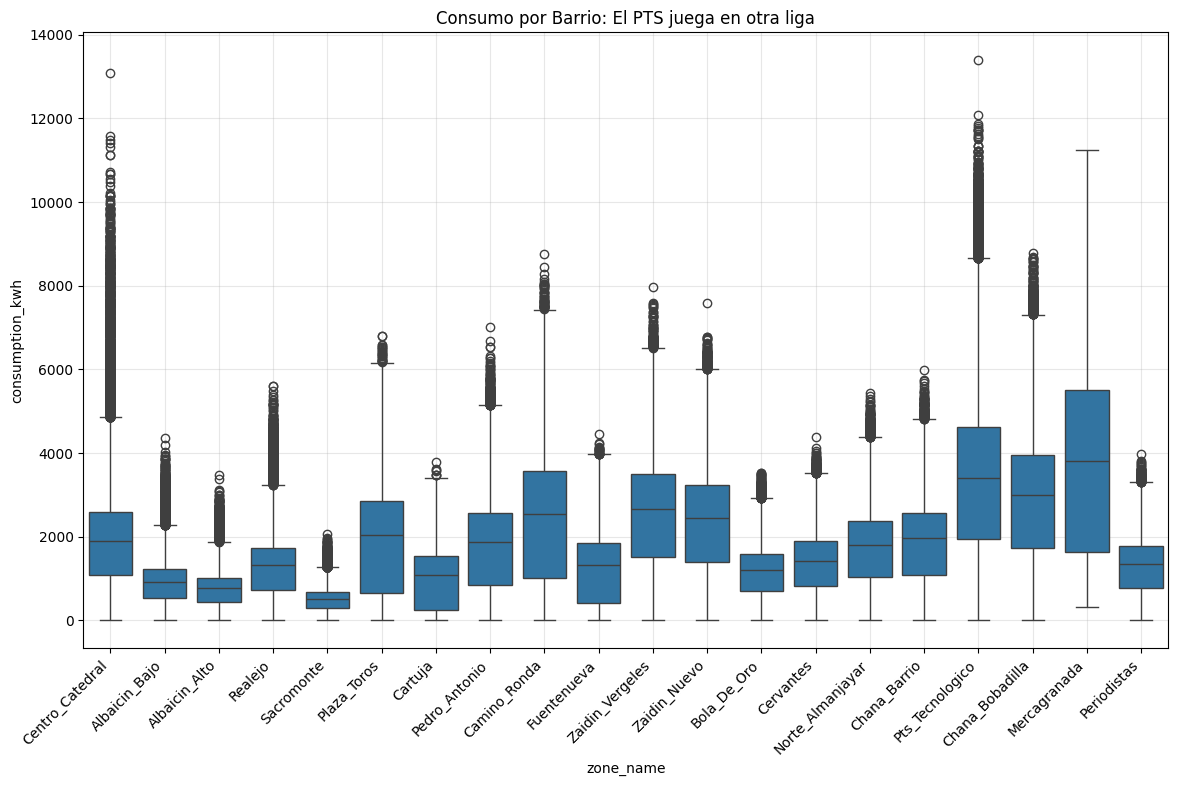

In [7]:
plt.figure(figsize=(14, 8))
# Boxplot separado por barrio para ver que lo que es outlier para uno, es normal para otro
sns.boxplot(x='zone_name', y='consumption_kwh', data=consumo_granada)
plt.xticks(rotation=45, ha='right') # Rotar nombres para leerlos bien
plt.title('Consumo por Barrio: El PTS juega en otra liga')
plt.grid(True, alpha=0.3)
plt.show()

Correlación temperatura-consumo por zona:
zone_name
Pts_Tecnologico     0.550562
Centro_Catedral     0.547196
Sacromonte          0.503278
Chana_Bobadilla     0.496001
Bola_De_Oro         0.495762
Norte_Almanjayar    0.495575
Albaicin_Alto       0.475211
Periodistas         0.468538
Zaidin_Nuevo        0.468288
Cervantes           0.468023
Mercagranada        0.448810
Albaicin_Bajo       0.442444
Zaidin_Vergeles     0.434458
Realejo             0.404263
Chana_Barrio        0.395202
Pedro_Antonio       0.253135
Camino_Ronda        0.193389
Plaza_Toros         0.142334
Fuentenueva         0.142185
Cartuja             0.092823
dtype: float64


C:\Users\garci\AppData\Local\Temp\ipykernel_13080\4226923058.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlaciones = consumo_granada.groupby('zone_name').apply(


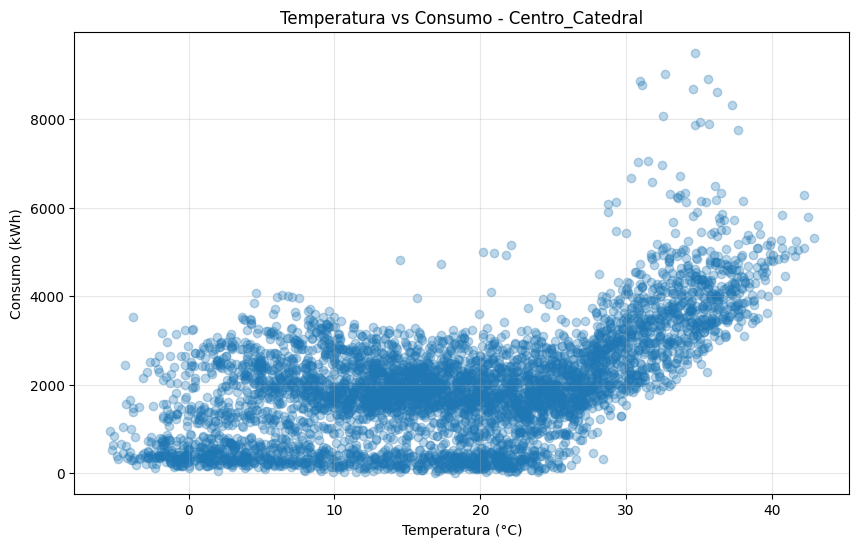

In [8]:
# CORRELACIÓN temperatura vs consumo
# Calcular correlación para cada zona
print("Correlación temperatura-consumo por zona:")
correlaciones = consumo_granada.groupby('zone_name').apply(
    lambda x: x['temperature'].corr(x['consumption_kwh'])
).sort_values(ascending=False)
print(correlaciones)

# Visualización scatter plot de una zona
zona_ejemplo = 'Centro_Catedral'
datos_zona = consumo_granada[consumo_granada['zone_name'] == zona_ejemplo].sample(5000)  # muestra para no saturar
plt.figure(figsize=(10, 6))
plt.scatter(datos_zona['temperature'], datos_zona['consumption_kwh'], alpha=0.3)
plt.xlabel('Temperatura (°C)')
plt.ylabel('Consumo (kWh)')
plt.title(f'Temperatura vs Consumo - {zona_ejemplo}')
plt.grid(True, alpha=0.3)
plt.show()

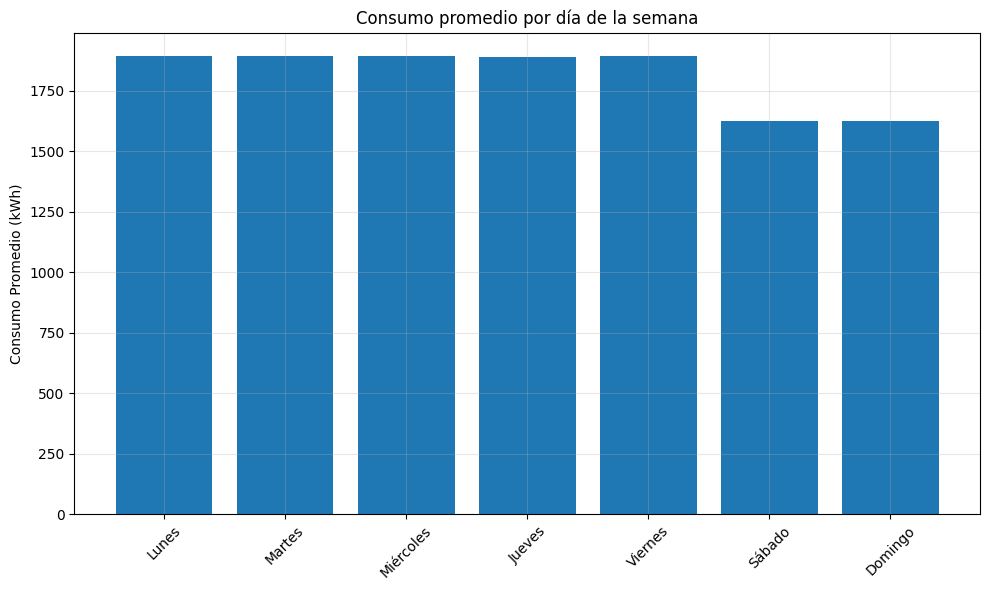

In [9]:
# PATRONES TEMPORALES - Día de la semana
consumo_granada['dia_semana'] = consumo_granada['timestamp'].dt.dayofweek  # 0=lunes, 6=domingo
consumo_granada['es_fin_semana'] = consumo_granada['dia_semana'].isin([5, 6])

# Consumo promedio por día de semana
consumo_por_dia = consumo_granada.groupby('dia_semana')['consumption_kwh'].mean()
dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

plt.figure(figsize=(10, 6))
plt.bar(range(7), consumo_por_dia.values)
plt.xticks(range(7), dias, rotation=45)
plt.ylabel('Consumo Promedio (kWh)')
plt.title('Consumo promedio por día de la semana')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

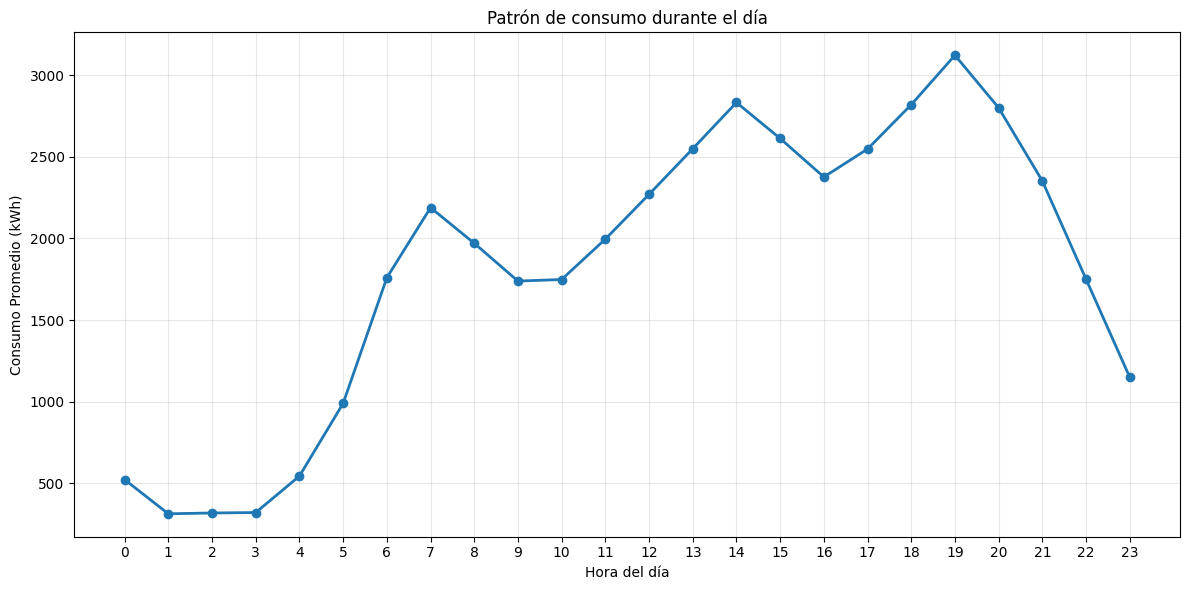

Horas pico de consumo:
hora_del_dia
19    3121.756485
14    2832.470182
18    2819.241296
20    2799.789730
15    2612.228431
Name: consumption_kwh, dtype: float64


In [10]:
# 3. PATRONES POR HORA DEL DÍA (muy importante para predicción)
consumo_granada['hora_del_dia'] = consumo_granada['timestamp'].dt.hour

# Consumo promedio por hora
consumo_por_hora = consumo_granada.groupby('hora_del_dia')['consumption_kwh'].mean()

plt.figure(figsize=(12, 6))
plt.plot(consumo_por_hora.index, consumo_por_hora.values, marker='o', linewidth=2)
plt.xlabel('Hora del día')
plt.ylabel('Consumo Promedio (kWh)')
plt.title('Patrón de consumo durante el día')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Horas pico de consumo:")
print(consumo_por_hora.nlargest(5))

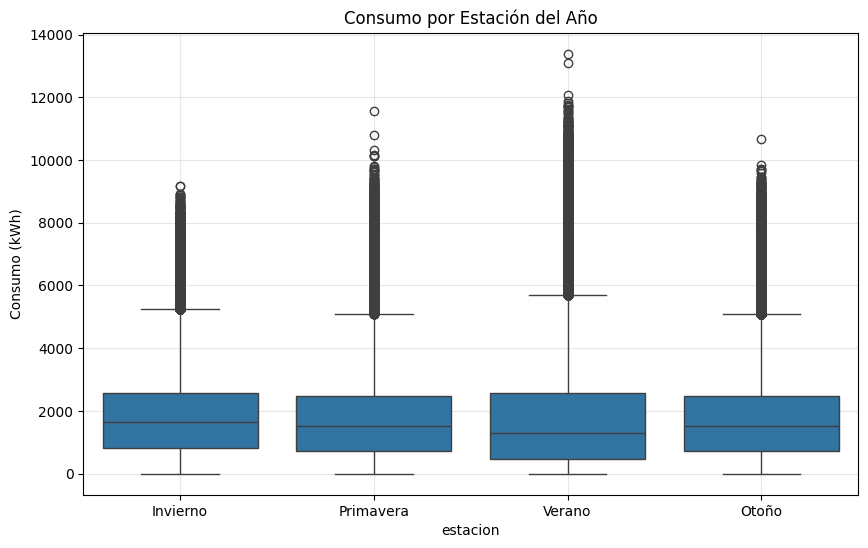

In [11]:
# 4. ESTACIONALIDAD - Consumo por mes/estación
consumo_granada['mes'] = consumo_granada['timestamp'].dt.month

# Definir estaciones
def get_estacion(mes):
    if mes in [12, 1, 2]:
        return 'Invierno'
    elif mes in [3, 4, 5]:
        return 'Primavera'
    elif mes in [6, 7, 8]:
        return 'Verano'
    else:
        return 'Otoño'

consumo_granada['estacion'] = consumo_granada['mes'].apply(get_estacion)

# Consumo por estación
plt.figure(figsize=(10, 6))
sns.boxplot(x='estacion', y='consumption_kwh', data=consumo_granada, 
            order=['Invierno', 'Primavera', 'Verano', 'Otoño'])
plt.title('Consumo por Estación del Año')
plt.ylabel('Consumo (kWh)')
plt.grid(True, alpha=0.3)
plt.show()

In [12]:
# 5. RESUMEN DE INSIGHTS PARA MODELADO
print("=" * 60)
print("RESUMEN DE INSIGHTS PARA CREAR FEATURES:")
print("=" * 60)

print("\n📊 Variables temporales importantes:")
print("  - Hora del día (picos en horas laborales)")
print("  - Día de la semana (laboral vs fin de semana)")
print("  - Mes/Estación (estacionalidad anual)")

print("\n🌡️ Variables ambientales:")
print("  - Temperatura (correlación con consumo)")

print("\n🏘️ Variables geográficas:")
print("  - Zone_name (cada zona tiene patrones únicos)")
print(f"  - Total zonas: {consumo_granada['zone_name'].nunique()}")

print("\n💡 Features a crear para el modelo:")
print("  1. Lags: consumo_hora_anterior, consumo_dia_anterior")
print("  2. Rolling means: media_ultima_24h, media_ultima_semana")
print("  3. Variables dummies: es_fin_semana, es_festivo")
print("  4. Encoding de zona: one-hot o target encoding")
print("  5. Interacciones: temperatura*hora, temperatura*estacion")


RESUMEN DE INSIGHTS PARA CREAR FEATURES:

📊 Variables temporales importantes:
  - Hora del día (picos en horas laborales)
  - Día de la semana (laboral vs fin de semana)
  - Mes/Estación (estacionalidad anual)

🌡️ Variables ambientales:
  - Temperatura (correlación con consumo)

🏘️ Variables geográficas:
  - Zone_name (cada zona tiene patrones únicos)
  - Total zonas: 20

💡 Features a crear para el modelo:
  1. Lags: consumo_hora_anterior, consumo_dia_anterior
  2. Rolling means: media_ultima_24h, media_ultima_semana
  3. Variables dummies: es_fin_semana, es_festivo
  4. Encoding de zona: one-hot o target encoding
  5. Interacciones: temperatura*hora, temperatura*estacion


## Comparación de consumo vs temperatura (2024)

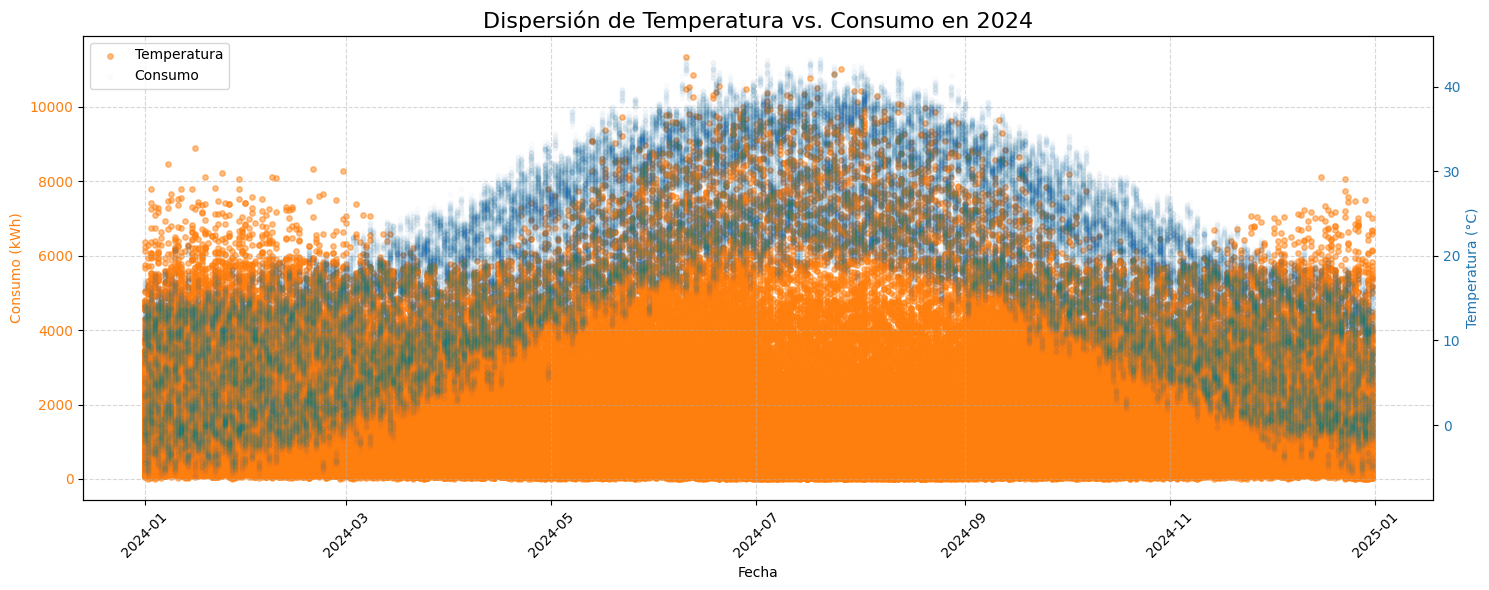

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Convertir la columna 'fecha' a datetime.
consumo_granada['fecha'] = pd.to_datetime(consumo_granada['fecha'], errors='coerce')

# Definir el año de interés
year_to_plot = 2024 

# 2. Filtrar los datos solo para el año 2024
df_filtered = consumo_granada.loc[
    consumo_granada['fecha'].dt.year == year_to_plot
].copy()

# ----------------------------------------------------------------------
# 3. GENERACIÓN DEL GRÁFICO CON DOS EJES Y (TWIN AXES) USANDO SCATTER
# ----------------------------------------------------------------------

fig, ax1 = plt.subplots(figsize=(15, 6)) # Crea la figura y el primer eje

# Eje Y Primario (ax1): TEMPERATURA
color_temp = 'tab:orange' 
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Consumo (kWh)', color=color_temp)

# Graficar la consumo con SCATTER
scatter1 = ax1.scatter(
    df_filtered['fecha'], 
    df_filtered['consumption_kwh'], 
    color=color_temp, 
    label='Temperatura', 
    s=15,
    alpha=0.5
)
ax1.tick_params(axis='y', labelcolor=color_temp)

# Crear el Segundo Eje Y (ax2) compartiendo el mismo eje X
ax2 = ax1.twinx() 
color_cons = 'tab:blue'
ax2.set_ylabel('Temperatura (°C)', color=color_cons) 

# Graficar el temperatura con SCATTER
scatter2 = ax2.scatter(
    df_filtered['fecha'], 
    df_filtered['temperature'], 
    color=color_cons, 
    label='Consumo', 
    s=10,
    alpha=0.02
)
ax2.tick_params(axis='y', labelcolor=color_cons)

# Título y Leyenda
plt.title(f'Dispersión de Temperatura vs. Consumo en {year_to_plot}', fontsize=16)
ax1.grid(True, linestyle='--', alpha=0.5)

# Unir las leyendas de ambos ejes (usando los objetos scatter)
ax1.legend([scatter1, scatter2], ['Temperatura', 'Consumo'], loc='upper left')

# Mejorar la visualización del eje X para fechas
ax1.tick_params(axis='x', rotation=45)
fig.tight_layout()
plt.show()

## CORRELACIÓN temperatura vs consumo

Correlación temperatura-consumo por zona:


C:\Users\garci\AppData\Local\Temp\ipykernel_13080\2234026462.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlaciones = consumo_granada.groupby('zone_name').apply(


zone_name
Pts_Tecnologico     0.550562
Centro_Catedral     0.547196
Sacromonte          0.503278
Chana_Bobadilla     0.496001
Bola_De_Oro         0.495762
Norte_Almanjayar    0.495575
Albaicin_Alto       0.475211
Periodistas         0.468538
Zaidin_Nuevo        0.468288
Cervantes           0.468023
Mercagranada        0.448810
Albaicin_Bajo       0.442444
Zaidin_Vergeles     0.434458
Realejo             0.404263
Chana_Barrio        0.395202
Pedro_Antonio       0.253135
Camino_Ronda        0.193389
Plaza_Toros         0.142334
Fuentenueva         0.142185
Cartuja             0.092823
dtype: float64


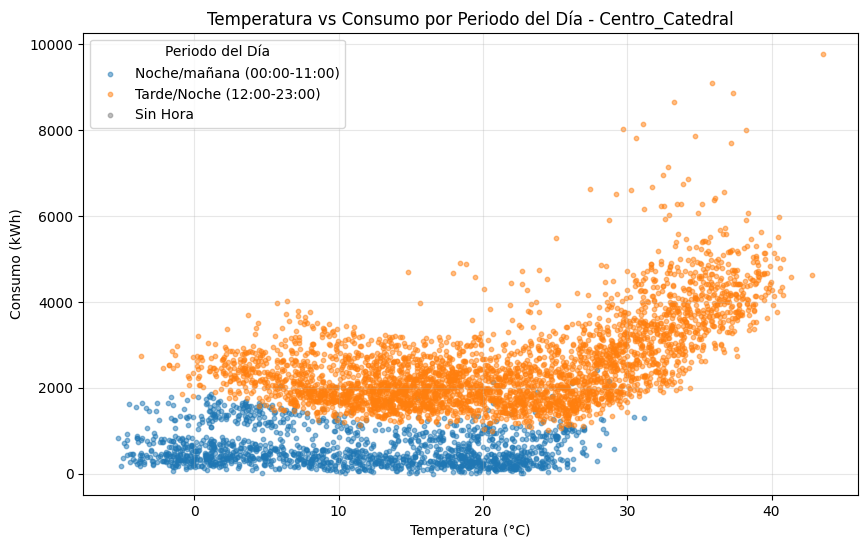

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Calcular Correlación (Parte sin cambios) ---
print("Correlación temperatura-consumo por zona:")
correlaciones = consumo_granada.groupby('zone_name').apply(
    lambda x: x['temperature'].corr(x['consumption_kwh'])
).sort_values(ascending=False)
print(correlaciones)

# --- 2. Preparar Datos para Visualización (CORRECCIÓN APLICADA AQUÍ) ---
zona_ejemplo = 'Centro_Catedral'
datos_zona = consumo_granada[consumo_granada['zone_name'] == zona_ejemplo].sample(5000, random_state=42).copy() 

# Convertir la columna 'timestamp' a datetime y usamos errors='coerce' para manejar posibles errores de formato.
datos_zona['timestamp'] = pd.to_datetime(datos_zona['timestamp'], errors='coerce')

# Extraer la hora del timestamp
datos_zona['hour'] = datos_zona['timestamp'].dt.hour 

# Clasificar los datos por periodo
def classify_time(hour):
    # Utilizamos .isna() para manejar los valores donde el timestamp no se pudo convertir
    if pd.isna(hour):
        return 'Sin Hora'
    elif 6 <= hour <= 22:
        return 'Tarde/Noche (12:00-23:00)'
    else:
        return 'Noche/mañana (00:00-11:00)'

datos_zona['time_period'] = datos_zona['hour'].apply(classify_time)

# --- 3. Visualización Scatter Plot con Colores ---
plt.figure(figsize=(10, 6))

# Definir colores para cada periodo
colors = {
    'Noche/mañana (00:00-11:00)': 'tab:blue', 
    'Tarde/Noche (12:00-23:00)': 'tab:orange',
    'Sin Hora': 'tab:gray' # Color para los datos que no se pudieron parsear
}

# Iterar sobre los periodos para graficar y asignar colores y etiquetas
for period, color in colors.items():
    subset = datos_zona[datos_zona['time_period'] == period]
    plt.scatter(
        subset['temperature'], 
        subset['consumption_kwh'], 
        alpha=0.5, 
        c=color, 
        label=period,
        s=10  # Tamaño del punto
    )

plt.xlabel('Temperatura (°C)')
plt.ylabel('Consumo (kWh)')
plt.title(f'Temperatura vs Consumo por Periodo del Día - {zona_ejemplo}')
plt.grid(True, alpha=0.3)
plt.legend(title='Periodo del Día')
plt.show()

## Grafica consumo/temperatura en una zona por día

✅ Datos encontrados: 25 registros
Primero: 2015-01-01 00:00:00
Último: 2015-01-01 23:00:00


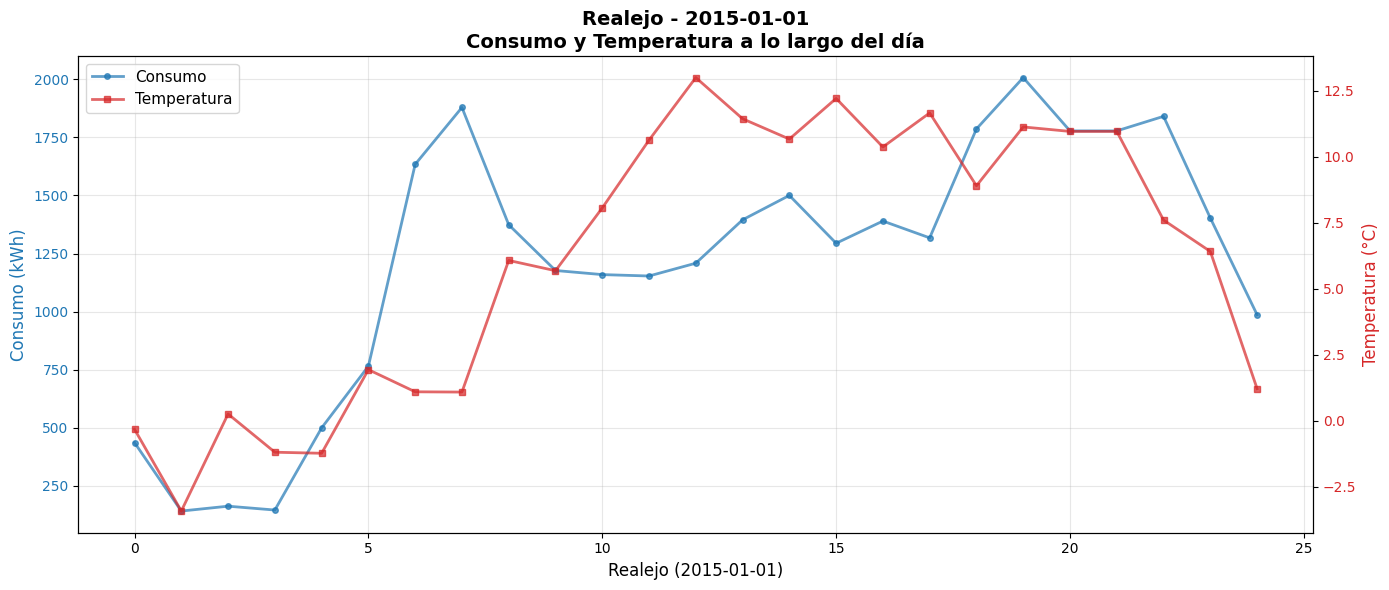

✅ Gráfico generado para Realejo el 2015-01-01


In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Parámetros
date_to_plot = '2015-01-01'
zone_to_plot = 'Realejo'

# Convertir timestamp a datetime
consumo_granada['timestamp'] = pd.to_datetime(consumo_granada['timestamp'], errors='coerce')

# Filtrar por fecha y zona usando timestamp
df_filtered = consumo_granada.loc[
    (consumo_granada['timestamp'].dt.date == pd.to_datetime(date_to_plot).date()) &
    (consumo_granada['zone_name'] == zone_to_plot)
].copy()

if df_filtered.empty:
    print(f"❌ No hay datos para {zone_to_plot} el {date_to_plot}")
    print(f"Zonas disponibles: {consumo_granada['zone_name'].unique()}")
else:
    # Extraer hora del timestamp
    df_filtered['hour'] = df_filtered['timestamp'].dt.hour
    # Ordenar por timestamp para mantener coherencia temporal
    df_filtered = df_filtered.sort_values('timestamp').reset_index(drop=True)
    
    print(f"✅ Datos encontrados: {len(df_filtered)} registros")
    print(f"Primero: {df_filtered['timestamp'].iloc[0]}")
    print(f"Último: {df_filtered['timestamp'].iloc[-1]}")
    
    # Crear gráfico con dos ejes Y
    fig, ax1 = plt.subplots(figsize=(14, 6))
    
    # Eje izquierdo: Consumo
    color_cons = 'tab:blue'
    ax1.set_xlabel(f'{zone_to_plot} ({date_to_plot})', fontsize=12)
    ax1.set_ylabel('Consumo (kWh)', color=color_cons, fontsize=12)
    ax1.plot(range(len(df_filtered)), df_filtered['consumption_kwh'].values, 
             color=color_cons, marker='o', linewidth=2, markersize=4, label='Consumo', alpha=0.7)
    ax1.tick_params(axis='y', labelcolor=color_cons)
    ax1.grid(True, alpha=0.3)
    
    # Eje derecho: Temperatura
    ax2 = ax1.twinx()
    color_temp = 'tab:red'
    ax2.set_ylabel('Temperatura (°C)', color=color_temp, fontsize=12)
    ax2.plot(range(len(df_filtered)), df_filtered['temperature'].values, 
             color=color_temp, marker='s', linewidth=2, markersize=4, label='Temperatura', alpha=0.7)
    ax2.tick_params(axis='y', labelcolor=color_temp)
    
    # Configurar título y leyenda
    plt.title(f'{zone_to_plot} - {date_to_plot}\nConsumo y Temperatura a lo largo del día', fontsize=14, fontweight='bold')
    
    # Leyenda combinada
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=11)
    
    fig.tight_layout()
    plt.show()
    
    print(f"✅ Gráfico generado para {zone_to_plot} el {date_to_plot}")